# Reinforcement Learning control strategies for Electric Vehicles fleet Virtual Power Plants
Thesis based on the development of a RL agent that manages a VPP through EVs charging stations in an household environment. Main optimization objectives of the VPP are: Valley filling, peak shaving and zero resulting load over time. Main action performed to reach objectives are: storage of Renewable energy resources and power push in the grid at high demand times. The development of the Virtual Power Plant environment is based on the ELVIS (Electric Vehicles Infrastructure Simulator) open library from DAI-Labor: https://github.com/dailab/elvis The thesis code is currently available at: (https://github.com/francescomaldonato/RL_VPP_Thesis)

Author: Francesco Maldonato

## Algorithms results' plotting Notebook

In [1]:
%%capture
!pip install scikit-learn==1.0.2
#!pip install scipy
!pip install plotly==5.9.0

In [3]:
#Cloning repository and changing directory
!git clone https://github.com/francescomaldonato/RL_VPP_Thesis.git
%cd RL_VPP_Thesis/data/algorithms_results/
%ls

In [19]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import scipy.linalg
from sklearn.linear_model import LinearRegression
from IPython.display import Image

In [5]:
A2C_data = pd.read_csv('algorithms_results_table/wandb_export_A2C.csv')
Maskable_data = pd.read_csv('algorithms_results_table/wandb_export_Maskable.csv')
TRPO_data = pd.read_csv('algorithms_results_table/wandb_export_TRPO.csv')
Recurrent_data = pd.read_csv('algorithms_results_table/wandb_export_Recurrent.csv')
Best_data = pd.read_csv('algorithms_results_table/wandb_export_Best_runs.csv')

In [6]:
A2C_data.dropna(how='any', axis=0, inplace = True) 
#A2C_data.info()
A2C_data["Name"] = ["A2C"]*len(A2C_data["Name"])
A2C_data.head()


Name  underconsume   overconsume    overcost  av_EV_energy_left  \
0  A2C  18711.913750  11136.357241  421.750680          62.700075   
1  A2C  24322.719108   6266.337148  241.618957          52.914322   
2  A2C  22630.960329   6866.831074  264.243082          55.587082   
3  A2C  24882.216600   6450.393151  247.899048          53.668971   
4  A2C  14221.505079  13679.002460  510.860221          69.775657   

   cumulative_reward  
0      -50939.344885  
1     -121125.483560  
2      -94082.173937  
3     -126536.960579  
4       36652.498877

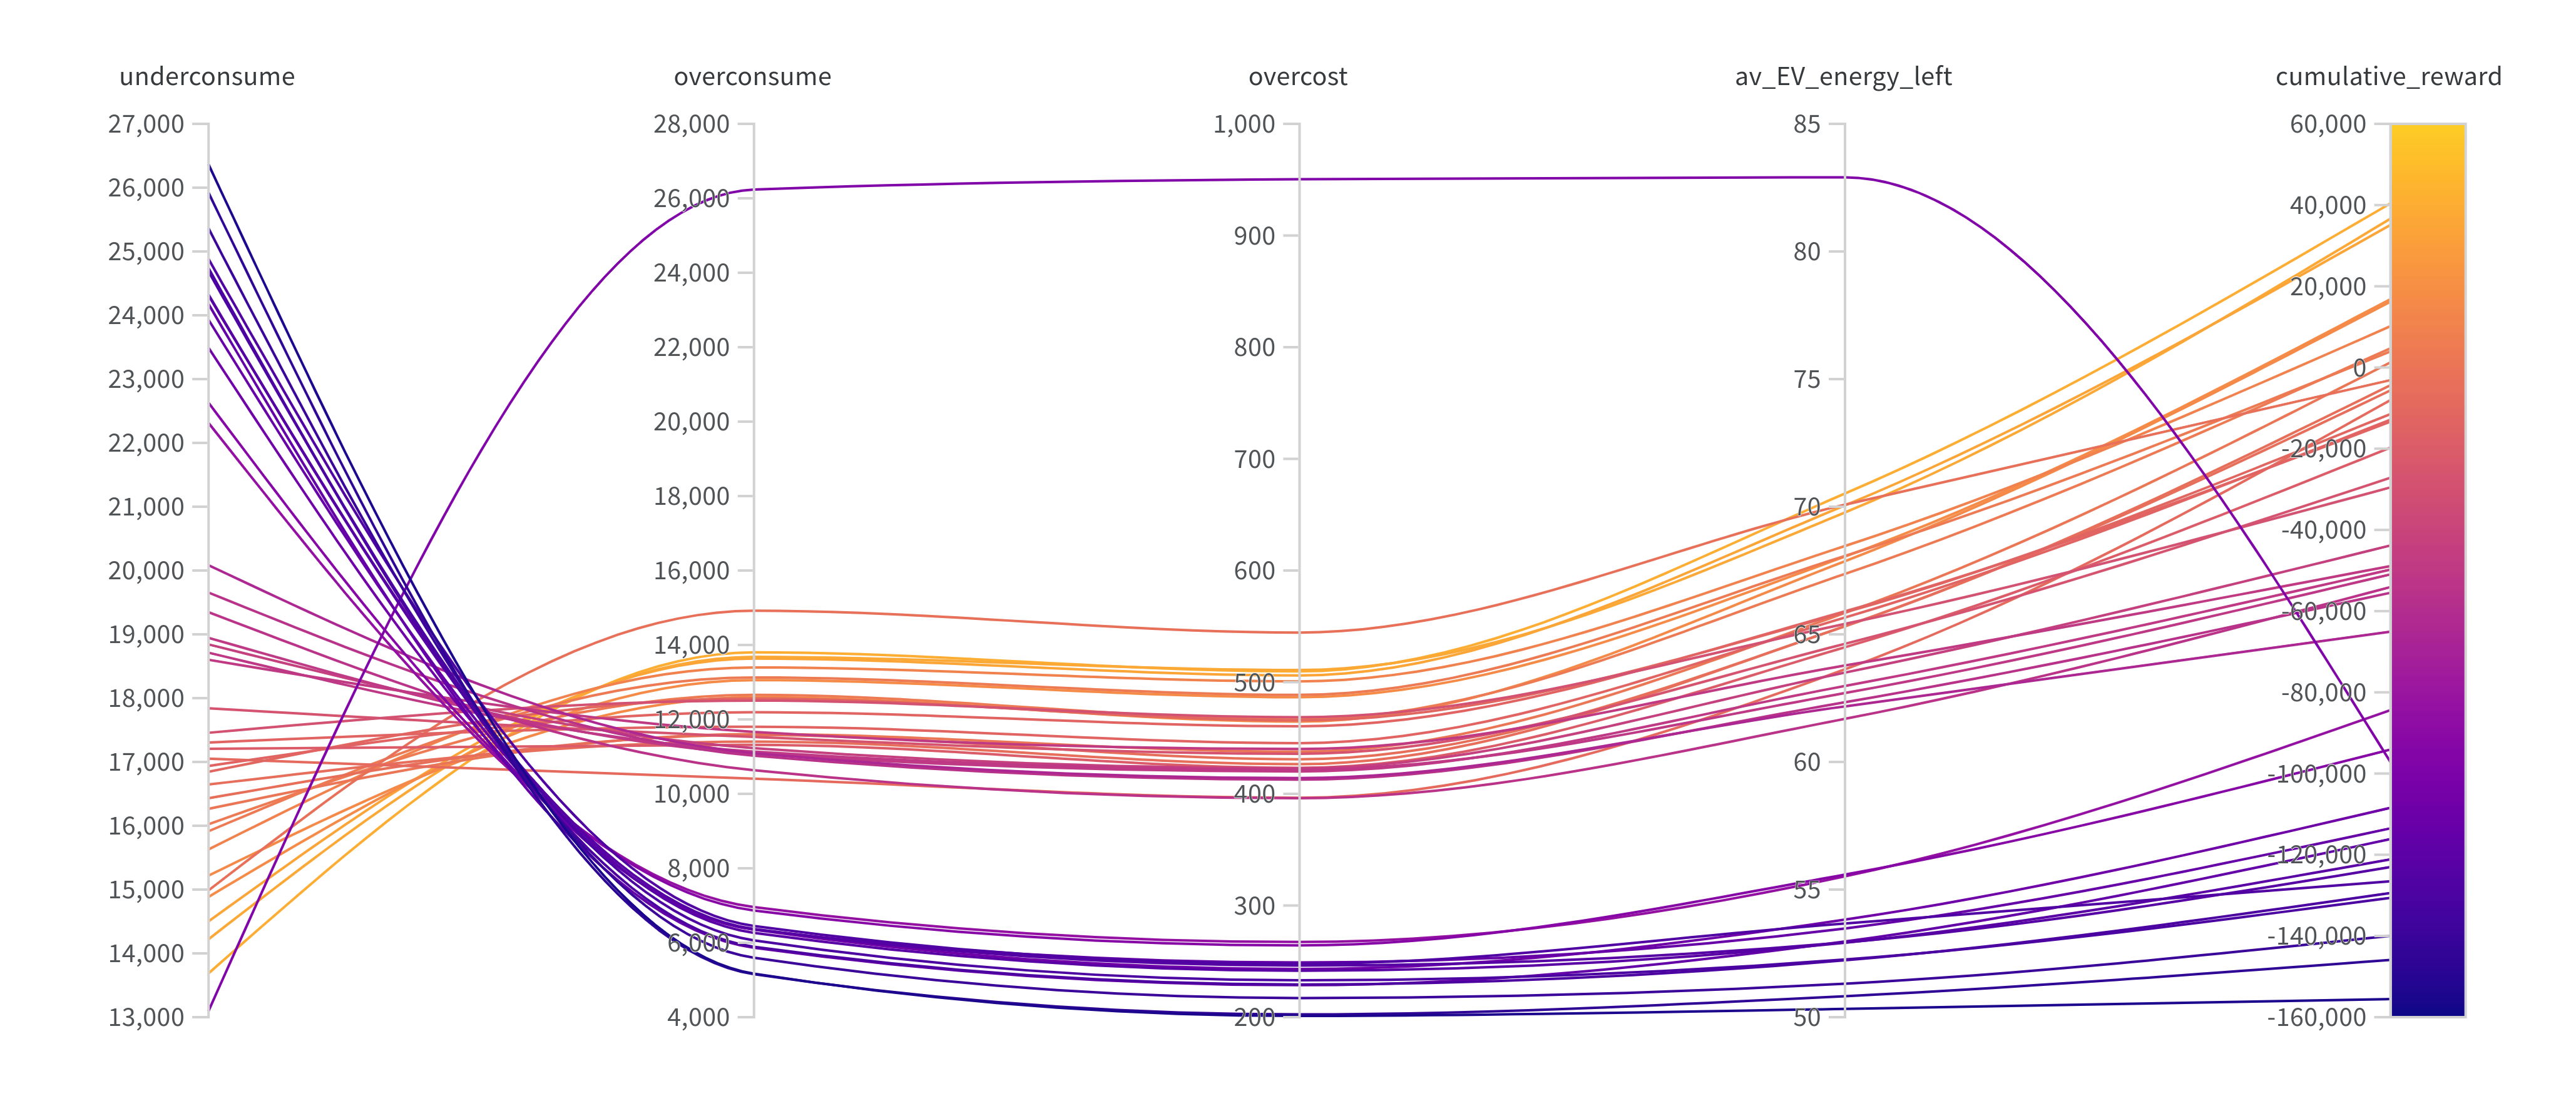

In [21]:
Image('algorithms_graphs/A2C_parameter_lines.png')

In [7]:
Maskable_data.dropna(how='any', axis=0, inplace = True) 
#Maskable_data.info()
Maskable_data["Name"] = ["MaskablePPO"]*len(Maskable_data["Name"])
Maskable_data.head()

Name  underconsume  overconsume    overcost  av_EV_energy_left  \
1  MaskablePPO  13039.010029  2427.750253   85.981839          60.579224   
2  MaskablePPO  12313.714494  3079.014162  109.490436          61.116922   
3  MaskablePPO  11900.582617  2976.559544  104.767691          61.779195   
4  MaskablePPO  13542.570417  3103.039663  116.966755          60.161513   
5  MaskablePPO  12511.960447  2690.264913   89.907618          60.821271   

   cumulative_reward  
1      198210.311000  
2      191338.888231  
3      197047.382255  
4      172887.284810  
5      202090.084076

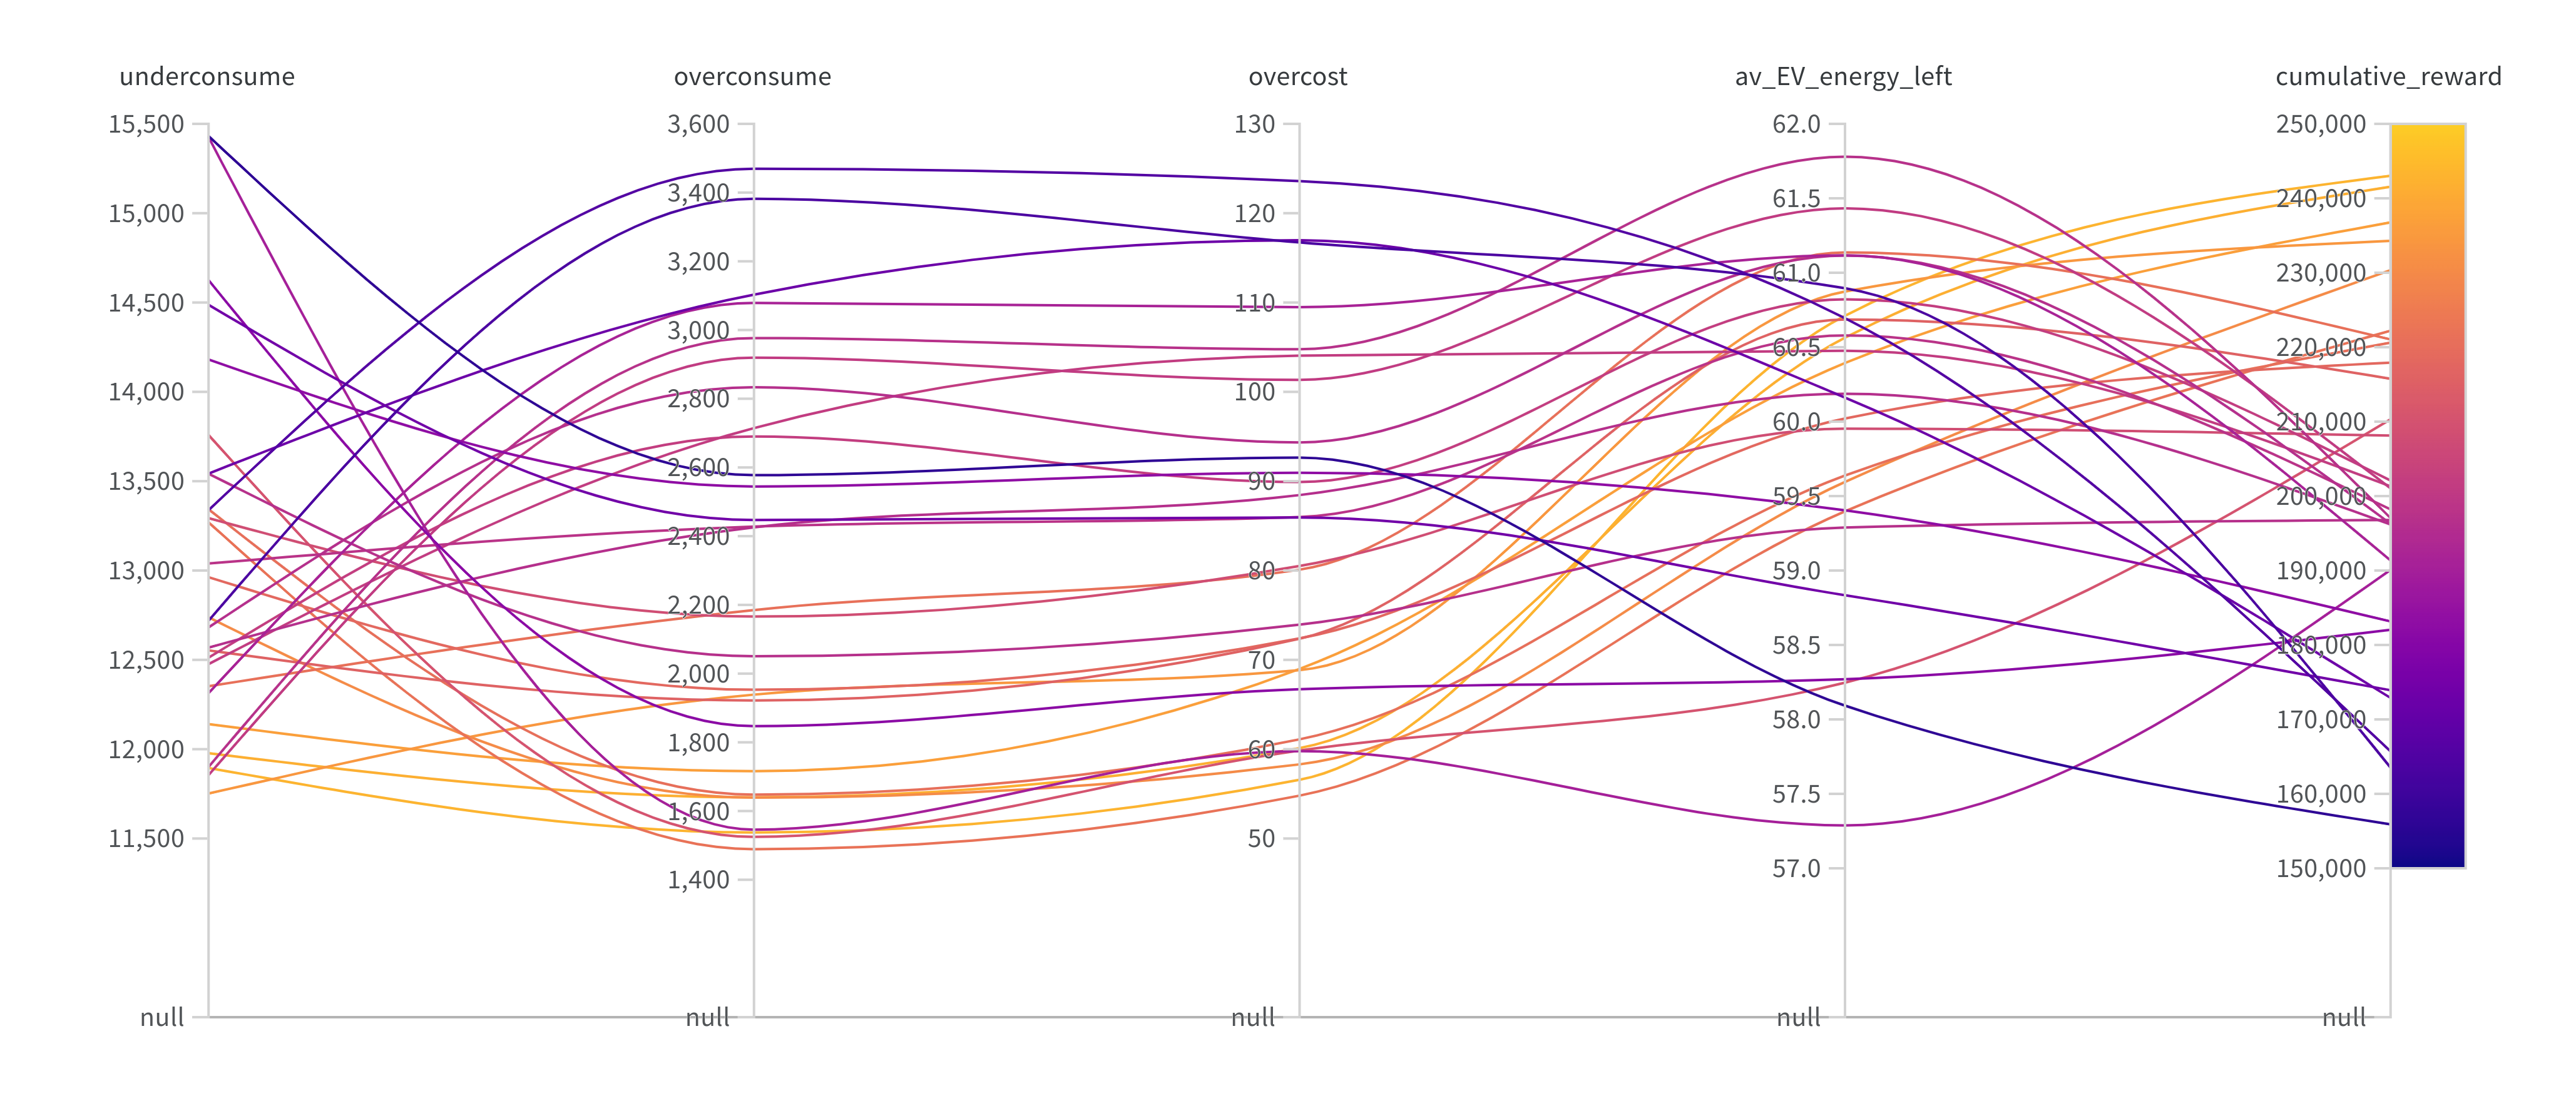

In [23]:
Image('algorithms_graphs/Maskable_parameter_lines.png')

In [8]:
TRPO_data.dropna(how='any', axis=0, inplace = True) 
#TRPO_data.info()
TRPO_data["Name"] = ["TRPO"]*len(TRPO_data["Name"])
TRPO_data.head()

Name  underconsume  overconsume    overcost  av_EV_energy_left  \
0   TRPO   6542.350596  3535.895240  123.613862          67.342194   
3   TRPO   7561.050908  6306.808409  209.443939          68.719196   
7   TRPO  10903.977679  1535.169883   55.015882          61.378094   
9   TRPO  10698.019293  3036.269808  106.388330          62.929184   
10  TRPO   9803.619032  2247.676256   80.068136          63.238426   

    cumulative_reward  
0       321907.753679  
3       258151.371670  
7       286897.424829  
9       256765.176313  
10      287271.899566

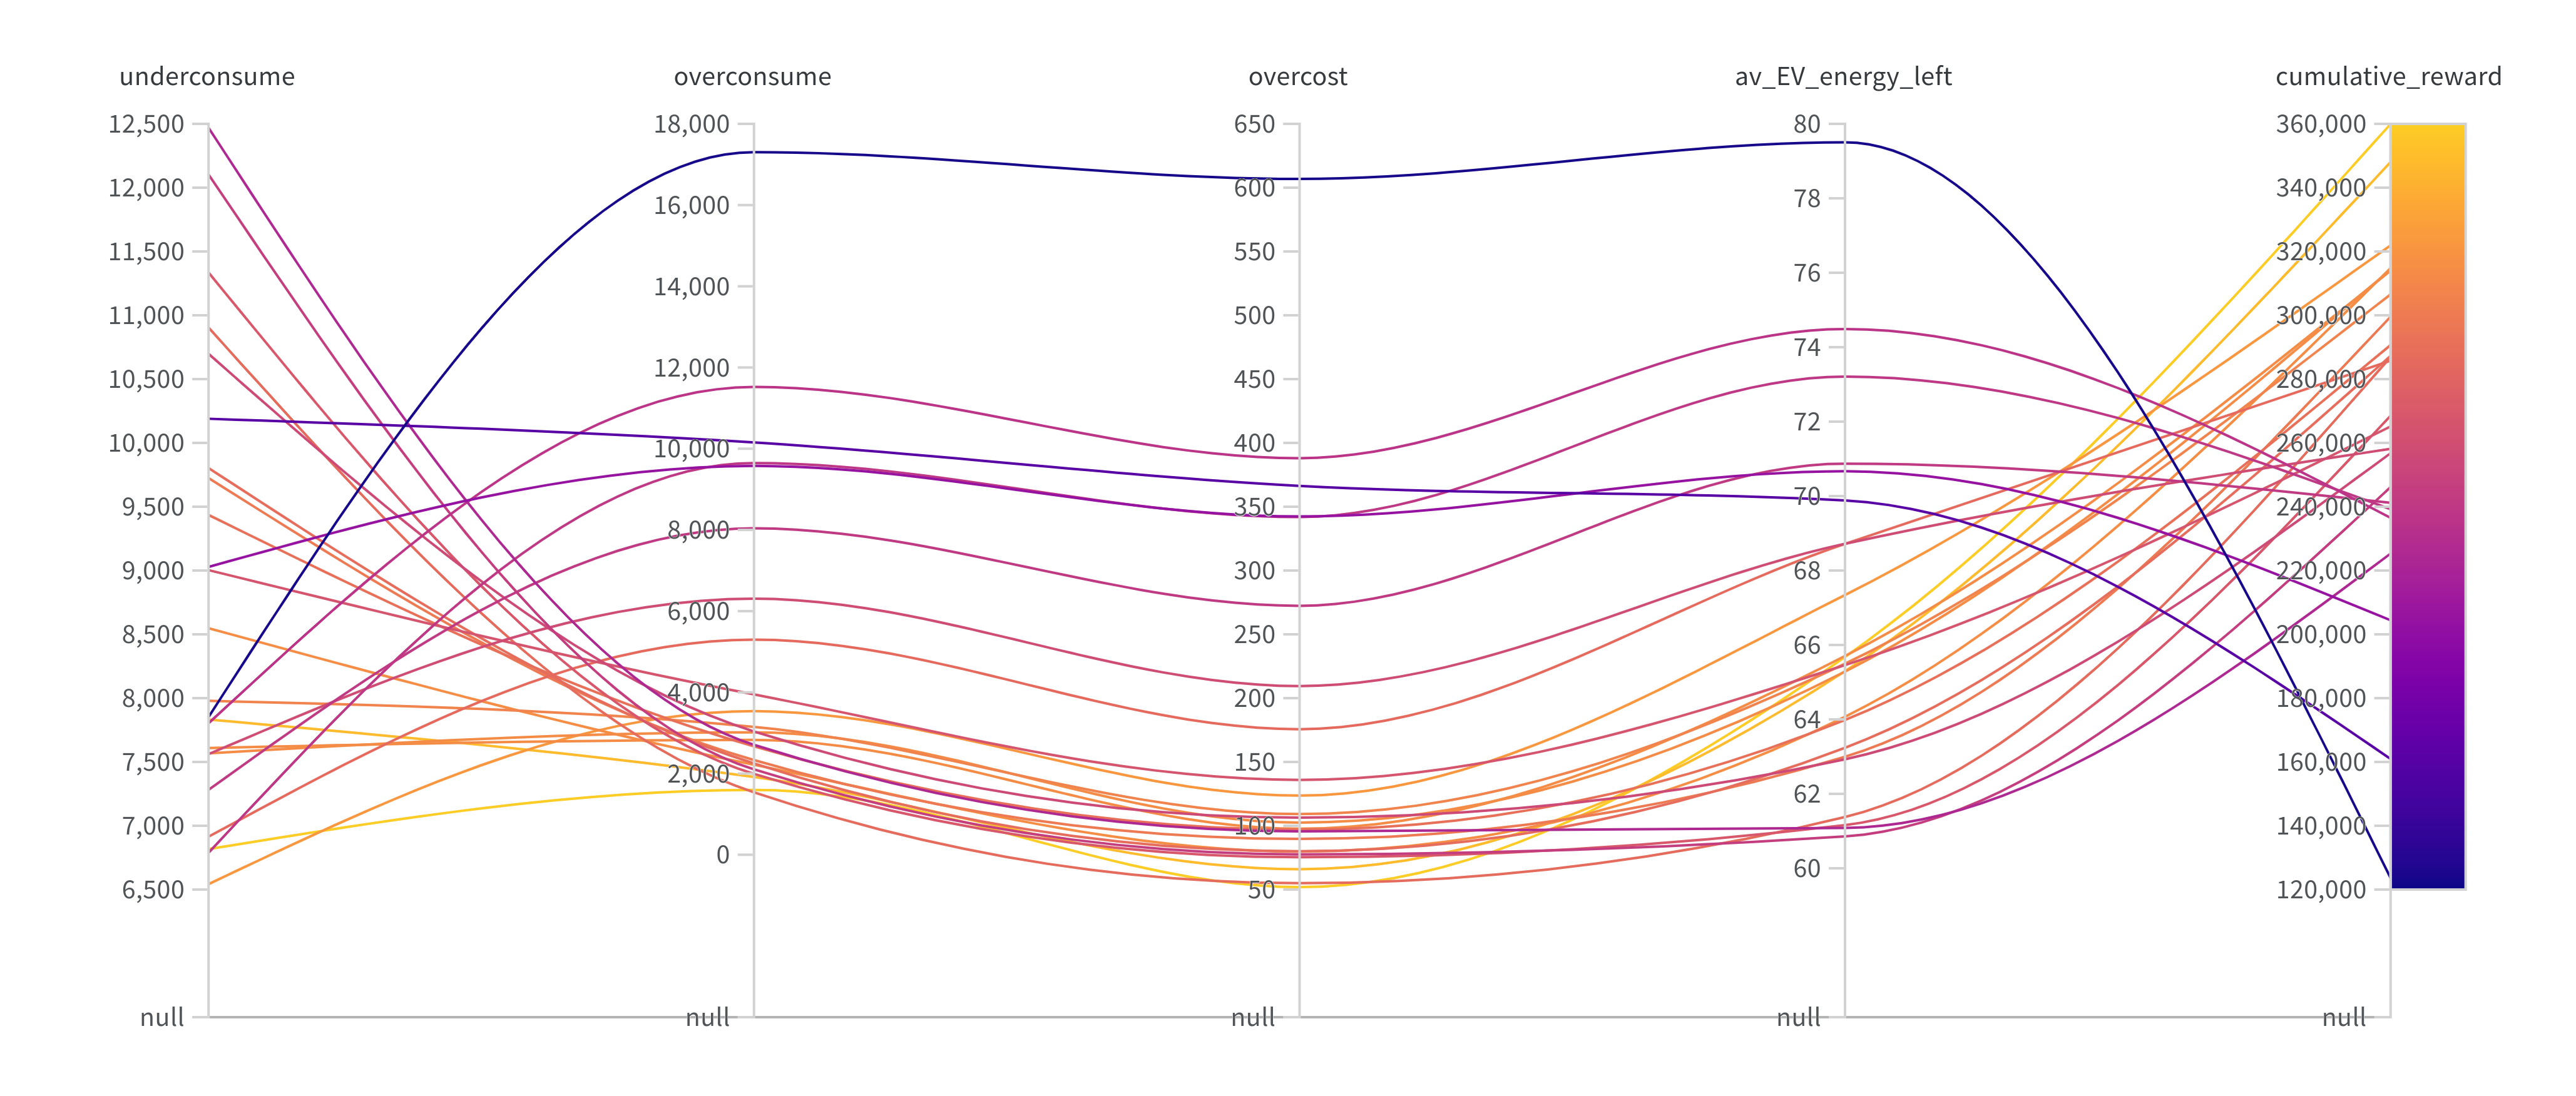

In [24]:
Image('algorithms_graphs/TRPO_parameter_lines.png')

In [9]:
Recurrent_data.dropna(how='any', axis=0, inplace = True) 
#Recurrent_data.info()
Recurrent_data["Name"] = ["RecurrentPPO"]*len(Recurrent_data["Name"])
Recurrent_data.head()

Name  underconsume  overconsume    overcost  av_EV_energy_left  \
1  RecurrentPPO   6293.227285  4606.153342  158.942974          68.798843   
2  RecurrentPPO  12956.206863  6929.364746  254.286998          64.727053   
3  RecurrentPPO   9809.402966  1920.388087   66.625071          62.788060   
5  RecurrentPPO  13994.401647  7690.087542  280.569864          64.369124   
6  RecurrentPPO  13360.530155  7422.129509  271.782267          64.339710   

   cumulative_reward  
1      324285.819336  
2      148305.767153  
3      272265.283027  
5      135038.083341  
6      137922.247480

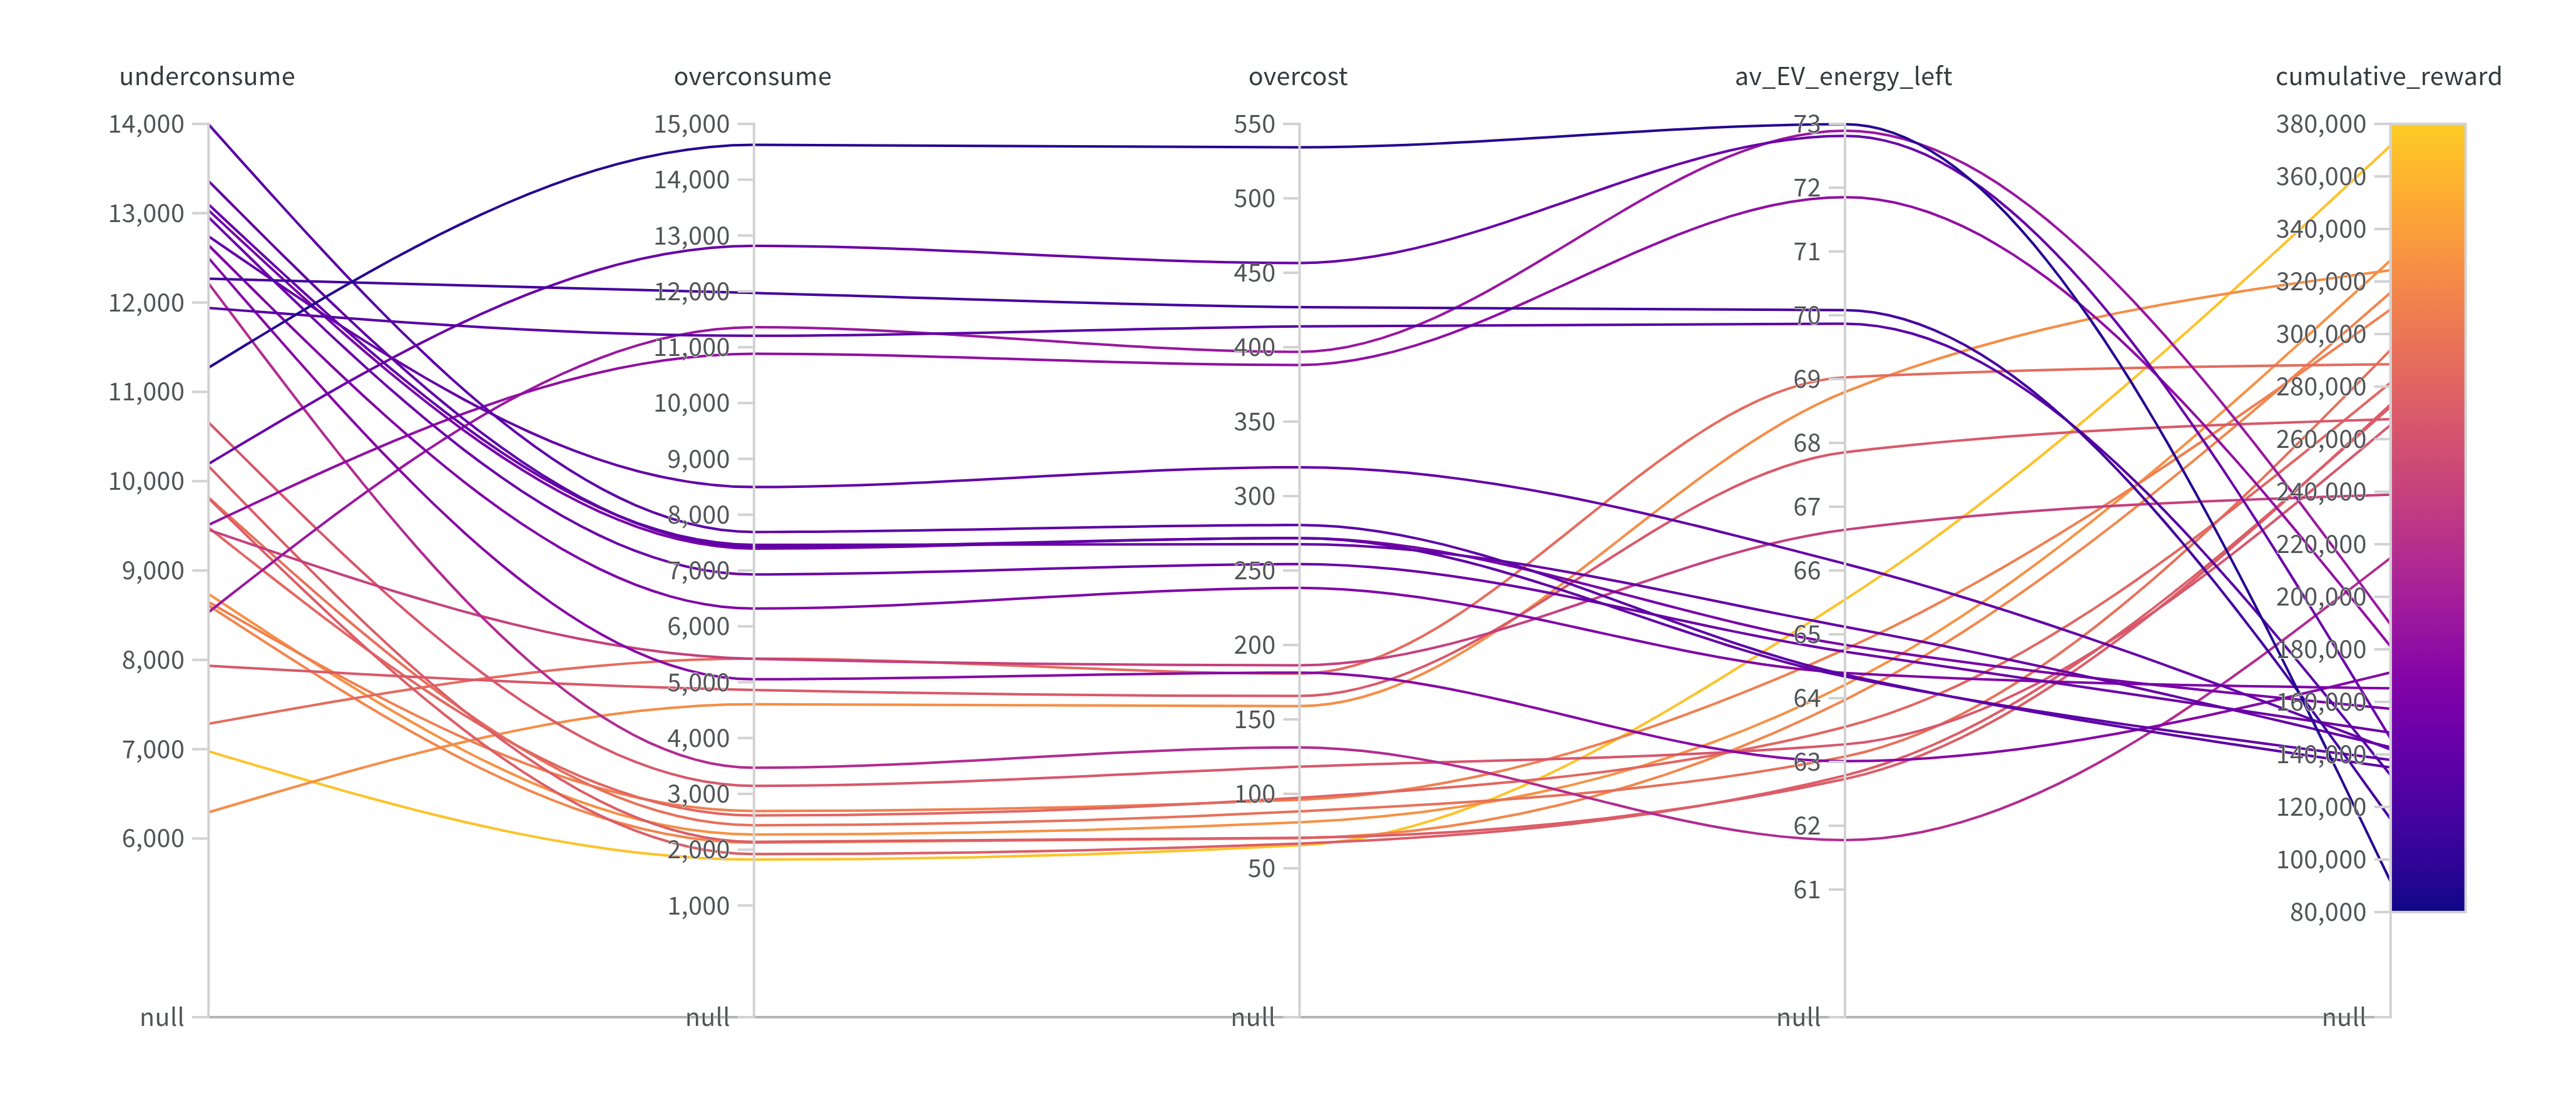

In [25]:
Image('algorithms_graphs/Recurrent_parameter_lines.png')

In [10]:
results_data = pd.concat([A2C_data, Maskable_data, TRPO_data, Recurrent_data, Best_data], axis=0)
results_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 4
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               126 non-null    object 
 1   underconsume       126 non-null    float64
 2   overconsume        126 non-null    float64
 3   overcost           126 non-null    float64
 4   av_EV_energy_left  126 non-null    float64
 5   cumulative_reward  126 non-null    float64
dtypes: float64(5), object(1)
memory usage: 6.9+ KB


In [11]:
results_data_=results_data.drop("Name", axis=1)
results_data_=results_data_.drop("overcost", axis=1)
results_data_=results_data_.drop("cumulative_reward", axis=1) 
data = results_data_.values

underc_min = results_data_["underconsume"].values[np.argmin(results_data_["underconsume"].values)]
overc_min = results_data_["overconsume"].values[np.argmin(results_data_["overconsume"].values)]
underc_max = results_data_["underconsume"].values[np.argmax(results_data_["underconsume"].values)]
overc_max = results_data_["overconsume"].values[np.argmax(results_data_["overconsume"].values)]

# regular grid covering the domain of the data
X,Y = np.meshgrid(np.arange(underc_min, underc_max, 100), np.arange(overc_min, overc_max, 100))
XX = X.flatten()
YY = Y.flatten()
# best-fit quadratic curve
A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
# evaluate it on a grid
Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

In [12]:
fig = px.scatter_3d(results_data, x='underconsume', y='overconsume', z='av_EV_energy_left',
                    #size='scaled_cumulative_reward',
                    hover_data=['cumulative_reward'],
                    color='Name',
                    labels={
                     "av_EV_energy_left": "Av.EV_battery_left (kWh)",
                     "Name": "Algorithm type",
                     "underconsume": "underconsume (kWh)",
                     "overconsume": "overconsume (kWh)"
                    })
#fig.update_layout(scene_zaxis_type="log")
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
fig.add_trace(go.Surface(x=X, y=Y, z=Z, showscale=False, opacity=0.5))
fig.update_layout(title_text='Algorithms results scatter plot',  width=1400,height=700,)
#fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [13]:
min_rew = results_data["cumulative_reward"].values[np.argmin(results_data["cumulative_reward"].values)]
max_rew = results_data["cumulative_reward"].values[np.argmax(results_data["cumulative_reward"].values)]
results_data["scaled_cumulative_reward"] = np.interp(results_data["cumulative_reward"].values, [min_rew, max_rew], [1, 50] )

fig = px.scatter_3d(results_data, x='underconsume', y='overconsume', z='av_EV_energy_left',
                    size='scaled_cumulative_reward',
                    hover_data=['cumulative_reward'],
                    color='Name',
                    labels={
                     "av_EV_energy_left": "Av.EV_battery_left (kWh)",
                     "Name": "Algorithm type",
                     "underconsume": "underconsume (kWh)",
                     "overconsume": "overconsume (kWh)"
                    })
#fig.update_layout(scene_zaxis_type="log")
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
fig.add_trace(go.Surface(x=X, y=Y, z=Z, showscale=False, opacity=0.3))
fig.update_layout(title_text='Algorithms results scatter plot (size being the scaled_cumulative_reward)',  width=1400,height=700,)

Output hidden; open in https://colab.research.google.com to view.

In [14]:
fig = px.scatter_3d(results_data, x='underconsume', y='overconsume', z='av_EV_energy_left',
                    #size='scaled_cumulative_reward',
                    color_continuous_scale=px.colors.sequential.Viridis,
                    hover_data=['cumulative_reward','Name'],
                    color='scaled_cumulative_reward',
                    labels={
                     "av_EV_energy_left": "Av.EV_battery_left (kWh)",
                     "Name": "Algorithm type",
                     "underconsume": "underconsume (kWh)",
                     "overconsume": "overconsume (kWh)"
                    })
#fig.update_layout(scene_zaxis_type="log")
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
fig.add_trace(go.Surface(x=X, y=Y, z=Z, showscale=False, opacity=0.3))
fig.update_layout(title_text='Algorithms results scatter plot',  width=1400,height=700,)

Output hidden; open in https://colab.research.google.com to view.

In [15]:
from sklearn.linear_model import LinearRegression
min_overc = results_data["overconsume"].values[np.argmin(results_data["overconsume"].values)]
max_overc = results_data["overconsume"].values[np.argmax(results_data["overconsume"].values)]
# Get index for the second highest value.
min_overc2 = results_data["overconsume"].values[results_data["overconsume"].values.argsort()[1]]
#print(min_overc2)
results_data["inverted_overconsume"] = np.interp(results_data["overconsume"].values, [min_overc, min_overc2, max_overc], [1, 1, 0] )

fig = px.scatter(results_data, x='underconsume', y='av_EV_energy_left',
                    #color = 'scaled_cumulative_reward',
                    #color = 'inverted_overconsume',
                    #color_continuous_scale=px.colors.sequential.Viridis,
                    #size = 'scaled_cumulative_reward',
                    size='inverted_overconsume',
                    hover_data=['cumulative_reward','overconsume'],
                    color='Name',
                    #text="Name",
                    labels={
                     "av_EV_energy_left": "Av.EV_battery_left (kWh)",
                     "Name": "Algorithm type",
                     "underconsume": "underconsume (kWh)",
                     "overconsume": "overconsume (kWh)"
                    })

fig.update_layout(title_text='Algorithms results scatter plot (size being the inverted overconsume)',  width=1600,height=800,)

In [16]:
fig = px.scatter(results_data, x='underconsume', y='av_EV_energy_left',
                    color = 'scaled_cumulative_reward',
                    #color = 'inverted_overconsume',
                    color_continuous_scale=px.colors.sequential.Viridis,
                    #size = 'scaled_cumulative_reward',
                    size='inverted_overconsume',
                    hover_data=['cumulative_reward','overconsume'],
                    #color='Name',
                    #text="Name",
                    labels={
                     "av_EV_energy_left": "Av.EV_battery_left (kWh)",
                     "Name": "Algorithm type",
                     "underconsume": "underconsume (kWh)",
                     "overconsume": "overconsume (kWh)"
                    })

fig.update_layout(title_text='Algorithms results scatter plot (size being the inverted overconsume)',  width=1500,height=800,)

In [17]:
min_overc = results_data["overconsume"].values[np.argmin(results_data["overconsume"].values)]
max_overc = results_data["overconsume"].values[np.argmax(results_data["overconsume"].values)]
# Get index for the second highest value.
min_overc2 = results_data["overconsume"].values[results_data["overconsume"].values.argsort()[1]]
#print(min_overc2)
results_data["inverted_overconsume"] = np.interp(results_data["overconsume"].values, [min_overc, min_overc2, max_overc], [1, 1, 0] )

# selecting rows based on condition
filtered_data = results_data.loc[results_data['inverted_overconsume'] > 0.98]

x = filtered_data['underconsume'].values
x = x.reshape((-1,1))
y = filtered_data['av_EV_energy_left'].values
model = LinearRegression().fit(x, y)
x_plot = np.arange(25000)
x_new = x_plot.reshape((-1, 1))
y_new = model.predict(x_new)

fig = px.scatter(results_data, x='underconsume', y='av_EV_energy_left',
                    #color = 'scaled_cumulative_reward',
                    color = 'inverted_overconsume',
                    #color_continuous_scale=px.colors.sequential.Viridis,
                    size = 'scaled_cumulative_reward',
                    #size='inverted_overconsume',
                    hover_data=['cumulative_reward','overconsume'],
                    #color='Name',
                    #text="Name",
                    labels={
                     "av_EV_energy_left": "Av.EV_battery_left (kWh)",
                     "Name": "Algorithm type",
                     "underconsume": "underconsume (kWh)",
                     "overconsume": "overconsume (kWh)"
                    })


#fig.update_layout(scene_zaxis_type="log")
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
fig.add_trace(go.Scatter(x=x_plot, y=y_new, line={'color':'yellow'},
                            #name="minimum overconsume regression line"
                            ))
fig.update_layout(title_text='Algorithms results scatter plot (size being the scaled_cumulative_reward)',  width=1600,height=800,)